1- A distribuição de funcionários por setor está mostrando barras com valores fixos para cada setor (RH, Financeiro, Vendas e TI), mas isso não traz uma análise profunda. Talvez fosse interessante incluir a porcentagem de funcionários por setor ou a comparação com a média para contextualizar melhor.

2- O gráfico está apresentando todos os pontos de satisfação com valor fixo e sem variação, o que sugere que os dados para a satisfação não estão bem distribuídos,  com isso a vizualização do gráfico fica meio sem nexo, onde nao conseguimos ver corretamente a media de satisfação dos setores. Isso pode indicar que a variável 'satisfação' está com pouca variação ou que os dados estão mal processados.
Seria mais interessante visualizar um gráfico de dispersão com uma melhor distribuição dos dados de satisfação. Caso todos os pontos de satisfação sejam iguais, seria preferível usar outro tipo de gráfico como barras ou boxplot para visualizar a distribuição de forma mais clara.

3- Um gráfico de evolução de salários requer uma variável no eixo X que mostre uma progressão ao longo do tempo, como anos e meses. Porém, no gráfico atual, o eixo X é representado pelos setores. Como estamos lidando com setores, o gráfico não está mostrando uma evolução, mas sim uma comparação de salários médios entre setores. Um gráfico de linha para evolução salarial precisa de uma variável temporal, não apenas as categorias. A ausência de uma variável temporal impede que o gráfico mostre uma verdadeira evolução.

5- Um erro que é muito aparente seria que as informações não estão ordenadas dificultando a vizualização além de que as idades estão extremamente coladas dificultando ainda mais a vizualização. Embora o gráfico seja de dispersão (scatter plot), não é fácil observar uma tendência entre a idade e o salário devido à falta de organização e à possível sobreposição de pontos. Para melhorar, seria interessante organizar os dados e, se possível, adicionar uma linha de tendência para ilustrar melhor qualquer correlação entre as variáveis.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv("C:/Users/jaja0/Desktop/Estudos/Estatisticas-e-Banco-de-dados/CHECKPOINT 1/dataset_prova.csv")

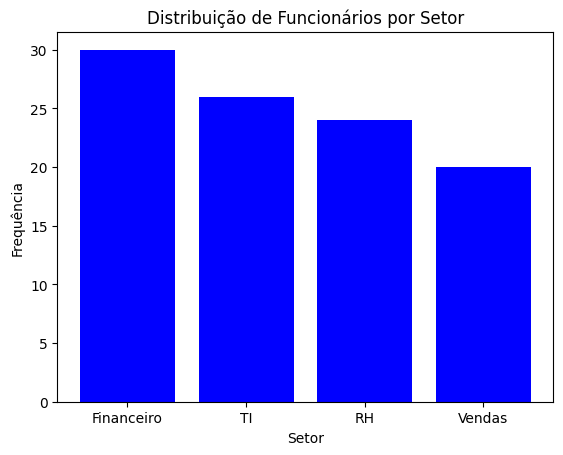

In [ ]:
# Gráfico 1 
setores_count = df['Setor'].value_counts()

plt.title("Distribuição de Funcionários por Setor")
plt.xlabel("Setor")
plt.ylabel("Frequência")
plt.bar(setores_count.index, setores_count.values, color='blue')
plt.show()

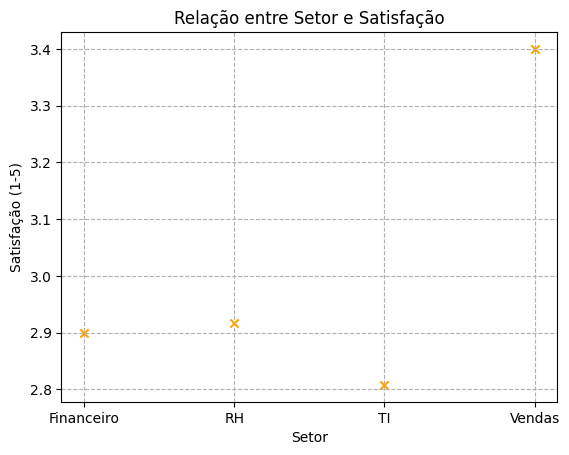

In [ ]:
# Gráfico 2

media_satisfacao = df.groupby('Setor')['Satisfação (1-5)'].mean()

plt.title("Relação entre Setor e Satisfação")
plt.xlabel("Setor")
plt.ylabel("Satisfação (1-5)")

# Gráfico de dispersão com marcador 'x' e linha
plt.scatter(media_satisfacao.index, media_satisfacao.values, color='orange', marker='x')
plt.grid(True, linestyle = '--')

plt.show()

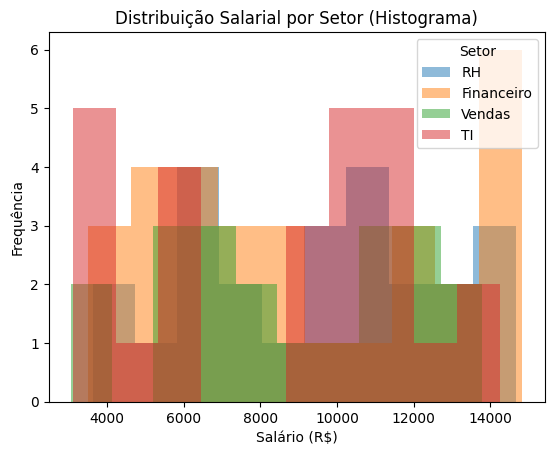

In [ ]:
# Gráfico 3

plt.title("Distribuição Salarial por Setor (Histograma)")
plt.xlabel("Salário (R$)")
plt.ylabel("Frequência")
for setor in df['Setor'].unique():
    plt.hist(df[df['Setor'] == setor]['Salário (R$)'], bins=10, alpha=0.5, label=setor)
plt.legend(title="Setor")
plt.show()

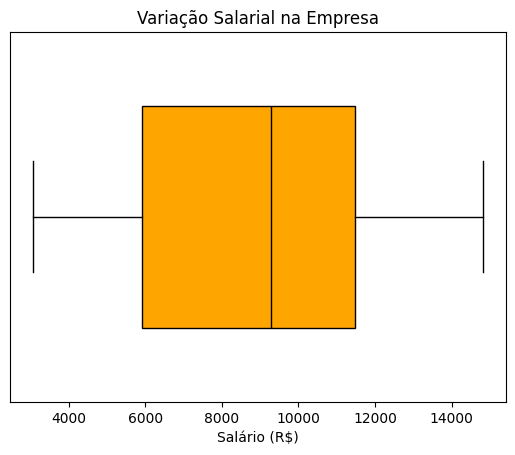

In [ ]:
# Gráfico 4

salarios = df["Salário (R$)"] 

plt.title("Variação Salarial na Empresa")
plt.xlabel("Salário (R$)")
plt.boxplot(salarios,  vert=False, patch_artist=True, widths=0.6, boxprops={"facecolor": "orange"}, medianprops={"color": "black"})
plt.yticks([])
plt.show()

C:\Users\jaja0\AppData\Local\Temp\ipykernel_17460\3156699457.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  faixa_salario = df.groupby('Faixa Etária')['Salário (R$)'].agg(['mean', 'std']).reset_index()


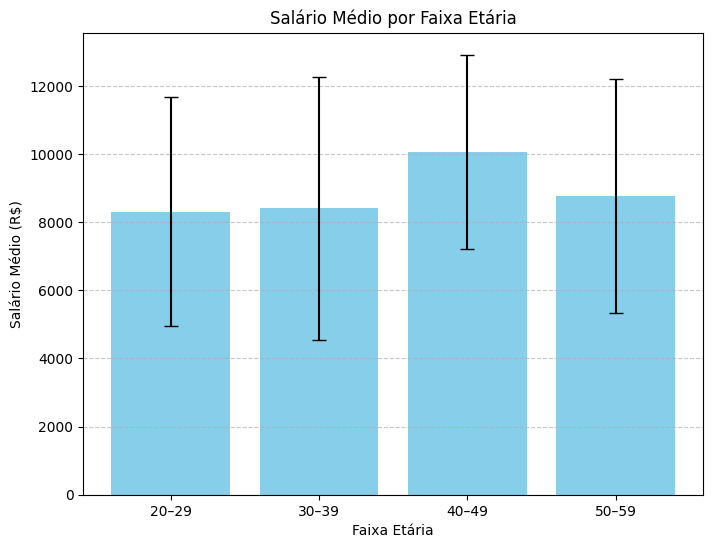

C:\Users\jaja0\AppData\Local\Temp\ipykernel_17460\3156699457.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Faixa Etária', y='Salário (R$)', data=df, palette='pastel')


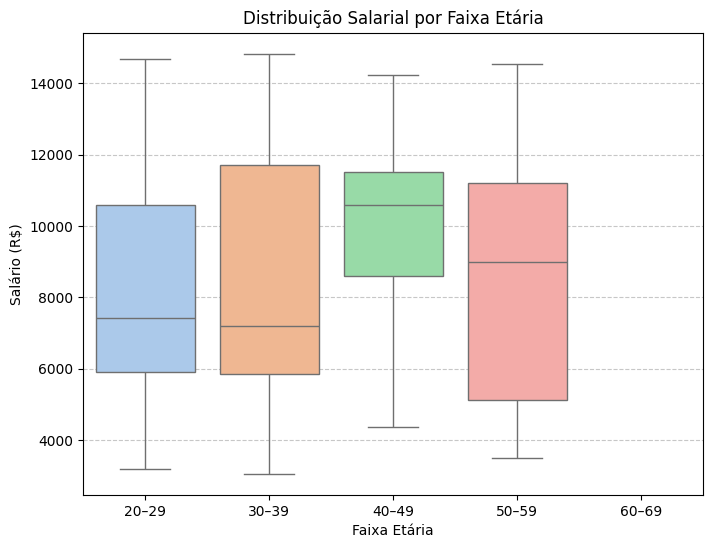

In [ ]:
# Grafico 5

bins = [20, 30, 40, 50, 60, 70]
labels = ['20–29', '30–39', '40–49', '50–59', '60–69']
df['Faixa Etária'] = pd.cut(df['Idade'], bins=bins, labels=labels, right=False)

faixa_salario = df.groupby('Faixa Etária')['Salário (R$)'].agg(['mean', 'std']).reset_index()
faixa_salario.columns = ['Faixa Etária', 'Média Salarial', 'Desvio Padrão']

# Gráfico 1: Salário Médio por Faixa Etária com barras de erro
plt.figure(figsize=(8, 6))
plt.bar(faixa_salario['Faixa Etária'], faixa_salario['Média Salarial'],
        yerr=faixa_salario['Desvio Padrão'], capsize=5, color='skyblue')
plt.title('Salário Médio por Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Salário Médio (R$)')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

# Gráfico 2: Distribuição Salarial por Faixa Etária
plt.figure(figsize=(8, 6))
sns.boxplot(x='Faixa Etária', y='Salário (R$)', data=df, palette='pastel')
plt.title('Distribuição Salarial por Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Salário (R$)')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()


*Analizando o Código*

O cálculo do desvio padrão está incorreto. O desvio padrão é uma medida de dispersão que deve ser calculada corretamente. Usar a média das diferenças absolutas pode distorcer a interpretação dos dados.

A correlação entre horas de trabalho e satisfação pode não implicar causalidade. Há muitos outros fatores que podem influenciar tanto a satisfação quanto a quantidade de horas trabalhadas. A conclusão de que mais horas de trabalho levam a mais satisfação pode ser uma interpretação precipitada, sem considerar outras variáveis.

In [36]:
df = pd.read_csv("C:/Users/jaja0/Desktop/Estudos/Estatisticas-e-Banco-de-dados/CHECKPOINT 1/dataset_prova.csv")


df["Índice de Desempenho"] = (df["Horas de Trabalho/Semana"] * df["Satisfação (1-5)"]) / df["Idade"]

# Cálculos estatísticos
produtividade_media = df["Índice de Desempenho"].mean()
desvio_padrao_salario = df["Salário (R$)"].std()  
correlacao = df["Satisfação (1-5)"].corr(df["Horas de Trabalho/Semana"])

# Exibir as conclusões
print(f"Após a análise dos dados, observamos que a produtividade média dos funcionários é de {produtividade_media:.2f}, "
      f"indicando uma média razoável de desempenho. O desvio padrão salarial, que reflete a variabilidade dos salários, é de {desvio_padrao_salario:.2f}, "
      f"o que indica uma certa dispersão nos salários. A correlação entre satisfação e horas de trabalho foi de {correlacao:.2f}, "
      f"o que sugere uma relação moderada entre essas variáveis, mas não implica necessariamente uma causalidade direta.")


Após a análise dos dados, observamos que a produtividade média dos funcionários é de 3.48, indicando uma média razoável de desempenho. O desvio padrão salarial, que reflete a variabilidade dos salários, é de 3408.97, o que indica uma certa dispersão nos salários. A correlação entre satisfação e horas de trabalho foi de 0.03, o que sugere uma relação moderada entre essas variáveis, mas não implica necessariamente uma causalidade direta.
